### Functions

In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime

In [2]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

def mean(list_obj, round_digits = 1):
    n = len(list_obj)
    mean_ = round(total(list_obj) / n, round_digits)
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    #lists of even length divided by 2 have reminder 0
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in list_obj:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in list_obj:
        # add on to the count of the value for each occurrence in list_obj
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, rounding, sample = False):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(list_obj)
    # use n to calculate average of sum squared diffs
    n = len(list_obj)
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in list_obj:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = round(sum_sq_diff / n, rounding)
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = round(sum_sq_diff / (n - 1), rounding)
    
    return variance_

def SD(list_obj, sample = False):
    # Standard deviation is the square root of variance
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    # determine the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [7]:
list = [5,9,2,3,1,14,23,9,7,9,12,9]
print("Total:", total(list))
print("Mean", mean(list,3))
print("Median:", median(list))
print("Variance", variance(list,1))
print("Variance (sample):", variance(list, 3, sample=True))
print("SD:", SD(list, sample = False))
print("SD (sample)", SD(list, sample=True))
print("Covariance")
print("Covariance (sample)")
print("Skewness")
print("Skewness (sample)")
print("Kurtosis")


Total: 103
Mean 8.583
Median: 9.0
Variance 33.1
Variance (sample): 36.084
SD: 5.744562646538029
SD (sample) 5.75325994545701
Covariance
Covariance (sample)
Skewness
Skewness (sample)
Kurtosis


In [8]:
def gather_stats(df, sample = True):
    #create a dictionary of dictionaries with an entry for each column of data in the df
    dct = {key:{} for key in df}
    # call each column of data and its name (KEY)
    for key, val in df.items():  #df.items creates list of tuples where idx 0 is the key and idx 1 is the column (or oject) 
        val.dropna(axis = 0, inplace = True)  # this drops the rows within a column (as referenced byu the VAL)
        dct[key]["mean"] = mean(val, 3)
        dct[key]["median"] = median(val, 3)
        dct[key]["variance"] = variance(val, sample)
        dct[key]["StDev"] = SD(val)
        dct[key]["skewness"]= skewness(val, sample)
        dct[key]["kurtosis"] = kurtosis(val, sample)
        
stats_df = pd.DataFrame(dct)

NameError: name 'dct' is not defined

In [5]:
!pip install pandas_datareader

In [10]:
import pandas
import datetime
import pandas_datareader.data as web

start = datetime.datetime(2015, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ['MSFT', 'AAPL', 'FB', 'TSLA']

for stock in stocks:
    data_dict[stock] = web.DataReader(stock, 'yahoo', start, end)

In [11]:
data_dict[key]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,47.419998,46.540001,46.660000,46.759998,27913900.0,41.269203
2015-01-05,46.730000,46.250000,46.369999,46.330002,39673900.0,40.889702
2015-01-06,46.750000,45.540001,46.380001,45.650002,36447900.0,40.289543
2015-01-07,46.459999,45.490002,45.980000,46.230000,29114100.0,40.801434
2015-01-08,47.750000,46.720001,46.750000,47.590000,29645200.0,42.001743
...,...,...,...,...,...,...
2021-09-23,300.899994,297.529999,298.850006,299.559998,18604600.0,299.559998
2021-09-24,299.799988,296.929993,298.230011,299.350006,14994200.0,299.350006
2021-09-27,296.470001,292.940002,296.140015,294.170013,23571700.0,294.170013


In [12]:
data_dict.keys()

dict_keys(['MSFT', 'AAPL', 'FB', 'TSLA'])

In [13]:
data_dict.values()

dict_values([                  High         Low        Open       Close      Volume  \
Date                                                                     
2015-01-02   47.419998   46.540001   46.660000   46.759998  27913900.0   
2015-01-05   46.730000   46.250000   46.369999   46.330002  39673900.0   
2015-01-06   46.750000   45.540001   46.380001   45.650002  36447900.0   
2015-01-07   46.459999   45.490002   45.980000   46.230000  29114100.0   
2015-01-08   47.750000   46.720001   46.750000   47.590000  29645200.0   
...                ...         ...         ...         ...         ...   
2021-09-23  300.899994  297.529999  298.850006  299.559998  18604600.0   
2021-09-24  299.799988  296.929993  298.230011  299.350006  14994200.0   
2021-09-27  296.470001  292.940002  296.140015  294.170013  23571700.0   
2021-09-28  290.779999  282.750000  289.799988  283.519989  43139400.0   
2021-09-29  285.700012  283.140015  285.100006  285.680115   3571907.0   

             Adj Close  

In [14]:
stock_close = pd.concat([df["Close"] for df in data_dict.values()], 
                        axis=1,
                         keys = data_dict.keys())
stock_close

,MSFT,AAPL,FB,TSLA
Date,,,,
2015-01-02,46.759998,27.332500,78.449997,43.862000
2015-01-05,46.330002,26.562500,77.190002,42.018002
2015-01-06,45.650002,26.565001,76.150002,42.256001
2015-01-07,46.230000,26.937500,76.150002,42.189999
2015-01-08,47.590000,27.972500,78.180000,42.124001
...,...,...,...,...
2021-09-23,299.559998,146.830002,345.959991,753.640015
2021-09-24,299.350006,146.919998,352.959991,774.390015
2021-09-27,294.170013,145.369995,353.579987,791.359985


In [15]:
stock_close.dtypes

MSFT    float64
AAPL    float64
FB      float64
TSLA    float64
dtype: object

In [16]:
colors = ["blue", "green", "red", "C3"]

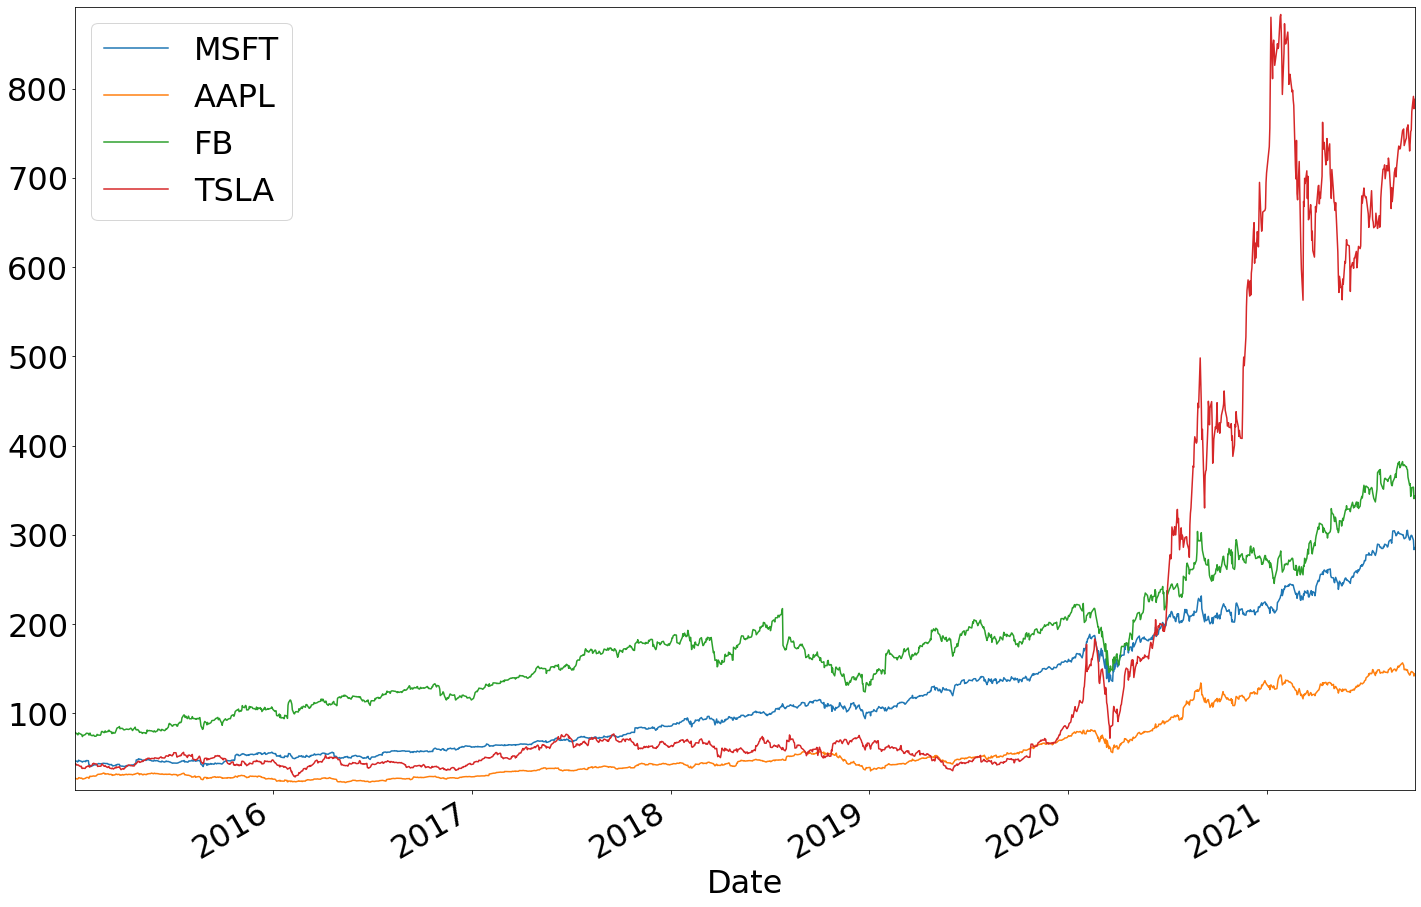

In [20]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":32})
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin']=.01

fig, ax = plt.subplots(figsize = (24,16))
for key in stock_close:
    stock_close[key].plot.line(ax=ax, legend=True)

it's helpful to log the y axis to view change in terms of propotion

C:\Users\SAND8464\AppData\Local\Temp/ipykernel_21676/1532276598.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


Text(0.5, 1.0, 'Stock Daily Close Values')

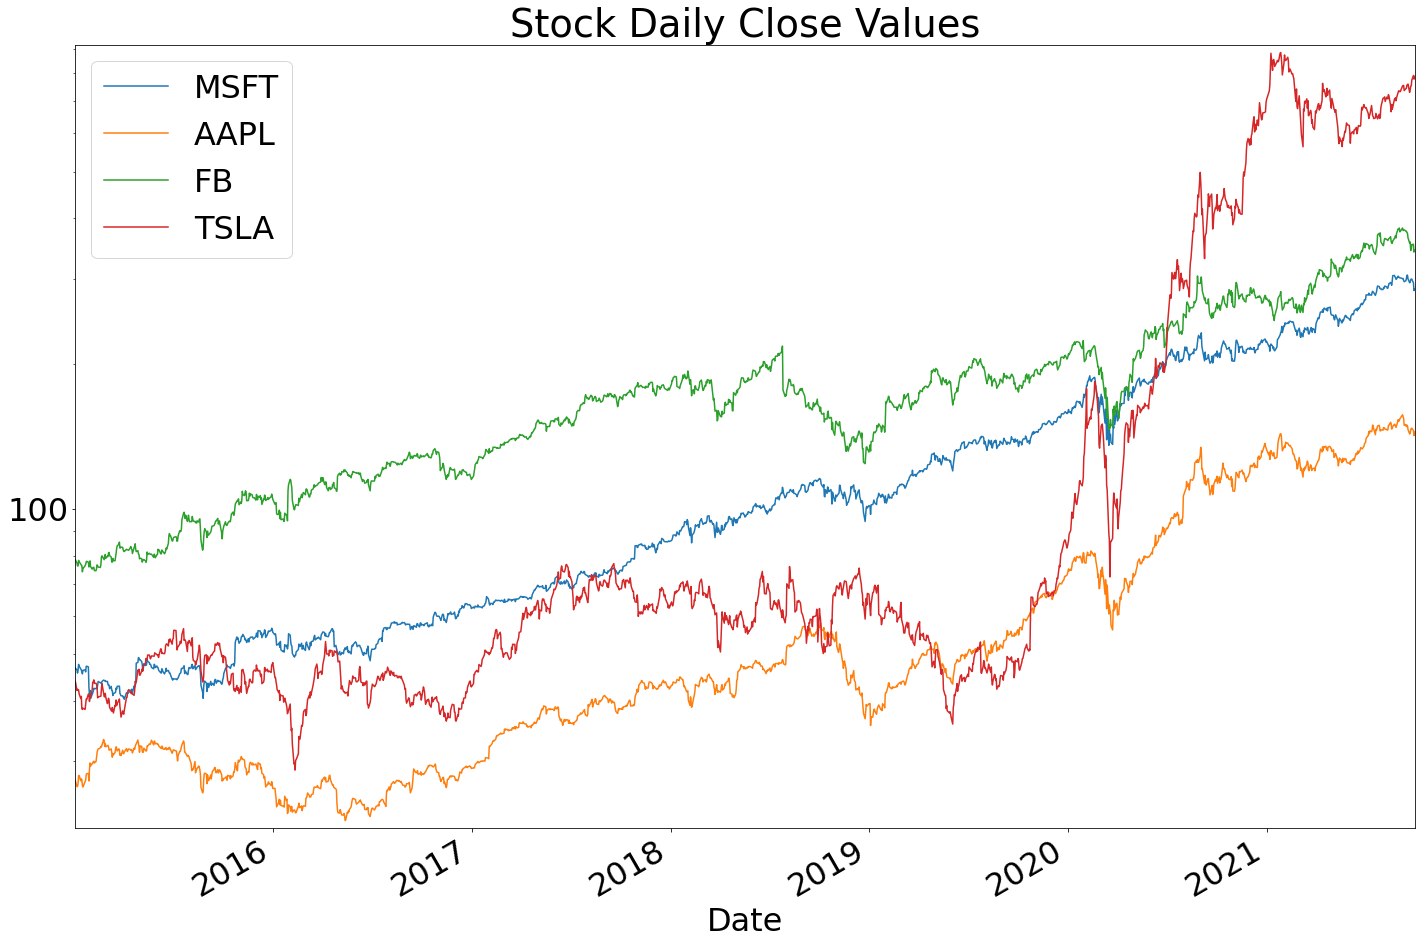

In [21]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":32})
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin']=.01

fig, ax = plt.subplots(figsize = (24,16))
stock_close.plot.line(ax=ax, legend=True)
ax.set_yscale("log")
y_vals = ax.get_yticks()

ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])

plt.title("Stock Daily Close Values")


In [ ]:
#Do the price change stuff...